# Analyzing Factors Influencing Student Performance

In this analysis, we will explore the factors that influence students' academic performance. We will use the [Student Performance Dataset](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset/data) shared by Rabie El Ekharoua (2020) from Kaggle.

You can aslo find overview of the dataset on Kaggle but here is a quick overview of the dataset.

The dataset consists of **15 columns** and **2,392 records**.

All columns are **categorical**, except:
- `Age`
- `GPA` - A continuous value ranging from **2.0 to 4.0**
- `StudyTimeWeekly` - Weekly study time in hours
- `Absences` - Number of absences during the school year

**Gender**  
- `0`: Male  
- `1`: Female

**Ethnicity**  
- `0`: Caucasian  
- `1`: African American  
- `2`: Asian  
- `3`: Other

**ParentalEducation**  
- `0`: None  
- `1`: High School  
- `2`: Some College  
- `3`: Bachelor's  
- `4`: Higher

**Tutoring**  
- `0`: No  
- `1`: Yes

**ParentalSupport**  
- `0`: None  
- `1`: Low  
- `2`: Moderate  
- `3`: High  
- `4`: Very High

**Sports**, **Music**, **Volunteering**  
- Each coded as: `0`: No, `1`: Yes

**GradeClass** (based on GPA)  
- `0`: A (GPA ≥ 3.5)  
- `1`: B (3.0 ≤ GPA < 3.5)  
- `2`: C (2.5 ≤ GPA < 3.0)  
- `3`: D (2.0 ≤ GPA < 2.5)  
- `4`: F (GPA < 2.0)


First, let's import the necessary libries.

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
# %matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Downloading the Dataset
Actually, you can’t access Kaggle datasets from Python code with just any key and password — Kaggle uses a secure API that requires valid credentials tied to your Kaggle account.

I've already downloaded the dataset from Kaggle, so we'll verify if `Student_performance_data _.csv` is available in the current folder.

In [12]:
import urllib.request

url = "https://raw.githubusercontent.com/username/repo-name/branch-name/path/to/file"
output_path = "downloaded_file.ext"

# urllib.request.urlretrieve(url, output_path)
# print("Download complete!")

In [13]:
import os
os.listdir()

['.ipynb_checkpoints',
 'barplot.png',
 'EDA_student_performance.ipynb',
 'GPA Distribution by Age.png',
 'GPA Distribution by ParentalEducation.png',
 'GPA Distribution by ParentalSupport.png',
 'Percentage Distribution of Ethnicities Across Grade Classes.png',
 'Population Distribution of Students by Ethnicity and Grade Class.png',
 'Scatter Plot of GPA vs StudyTimeWeekly.png',
 'Scatter Plot of GPA vs. Absences.png',
 'students-performance-dataset',
 'Student_performance_data _.csv']

## Data Preparation and Cleaning

After downloading the dataset, we will check for any missing or incorrect data. 

In [14]:
import pandas as pd
df_std_pfm=pd.read_csv('Student_performance_data _.csv')

In [15]:
df_std_pfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [16]:
df_std_pfm.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [17]:
df_std_pfm.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


>The dataset include 15 columns with 2393 records
>The columns contains no null values
>min and max values of columns are in possible range. 

## Exploratory Analysis and Visualization

We will find correlations between numeric columns and GPA using scatterplots, analyze the distribution of GPA among binary variables using barplots, explore the distribution of GPA among ordinal variables using boxplots, and examine the relationships between GradeClass and the nominal variables using heatmaps and line graphs.


> Instructions (delete this cell)
>
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

### Correlations Between Variables


#### Correlation Between GPA and StudyTimeWeekly

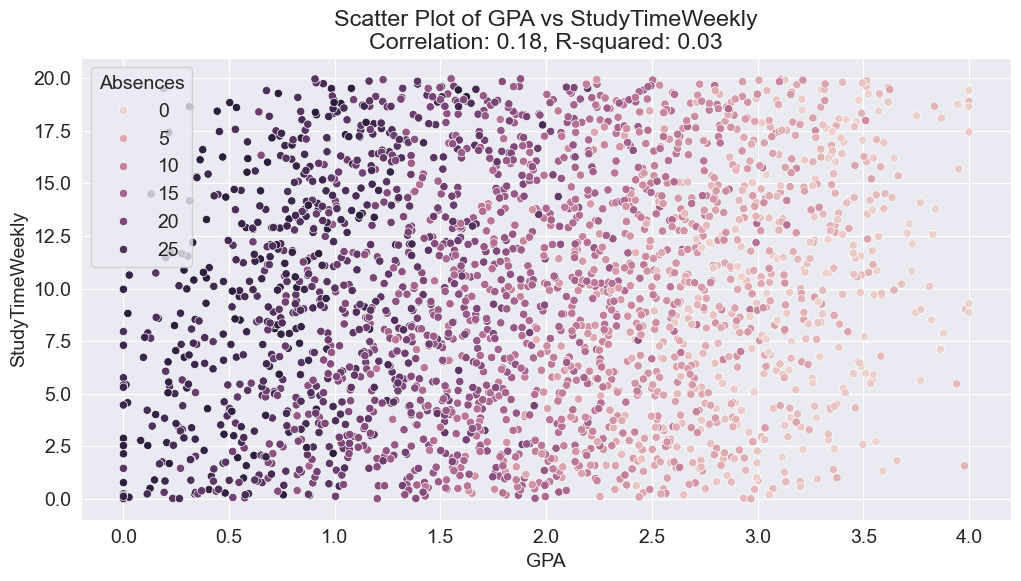

In [20]:
# plt.figure(figsize=(12, 6))
# sns.regplot(x=df_std_pfm.GPA,y=df_std_pfm.StudyTimeWeekly ,data=df_std_pfm)

sns.scatterplot(x=df_std_pfm.GPA,y=df_std_pfm.StudyTimeWeekly, 
                hue=df_std_pfm.Absences 
                ,data=df_std_pfm)
plt.legend(title='Absences', loc='upper left')

corr, _ = stats.pearsonr(df_std_pfm['GPA'], df_std_pfm['StudyTimeWeekly'])
r_squared = corr ** 2

plt.title(f'Scatter Plot of GPA vs StudyTimeWeekly\nCorrelation: {corr:.2f}, R-squared: {r_squared:.2f}');
plt.savefig('Scatter Plot of GPA vs StudyTimeWeekly.png')

In [20]:
# Calculate means
mean_gpa = df_std_pfm['GPA'].mean()
mean_study_time = df_std_pfm['StudyTimeWeekly'].mean()

# Calculate standard deviations
std_gpa = df_std_pfm['GPA'].std(ddof=0)  # population std dev
std_study_time = df_std_pfm['StudyTimeWeekly'].std(ddof=0)  # population std dev

# Calculate Z-scores
df_std_pfm['Z_GPA'] = (df_std_pfm['GPA'] - mean_gpa) / std_gpa
df_std_pfm['Z_StudyTimeWeekly'] = (df_std_pfm['StudyTimeWeekly'] - mean_study_time) / std_study_time

print(df_std_pfm[['Z_GPA','Z_StudyTimeWeekly']].head(4))


      Z_GPA  Z_StudyTimeWeekly
0  1.118086           1.780336
1  1.242374           0.997376
2 -1.960277          -0.984045
3  0.161790           0.045445


In [21]:
# df_outliers=df_std_pfm[(df_std_pfm[df_std_pfm['Z_GPA']>3] )| (df_std_pfm[df_std_pfm['Z_GPA']<-3]) | 
# (df_std_pfm[df_std_pfm['Z_StudyTimeWeekly']>3]) | (df_std_pfm[df_std_pfm['Z_StudyTimeWeekly']<-3])]
# df_outliers.head()

# Corrected filtering of outliers
df_outliers = df_std_pfm[(df_std_pfm['Z_GPA'] > 3) | (df_std_pfm['Z_GPA'] < -3) | 
                         (df_std_pfm['Z_StudyTimeWeekly'] > 3) | (df_std_pfm['Z_StudyTimeWeekly'] < -3)]

df_outliers.head()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Z_GPA,Z_StudyTimeWeekly


In [22]:
df_std_pfm['Z_GPA'] > 3
df_std_pfm['Z_GPA'] .max()

np.float64(2.288409752881429)

> There is a very weak positive correlation of 0.18 between GPA and StudyTimeWeekly. This indicates that while study time has some influence on GPA, it is not a major determining factor. Many other variables likely play a significant role in students' academic performance.

#### Correlation Between GPA and Absences

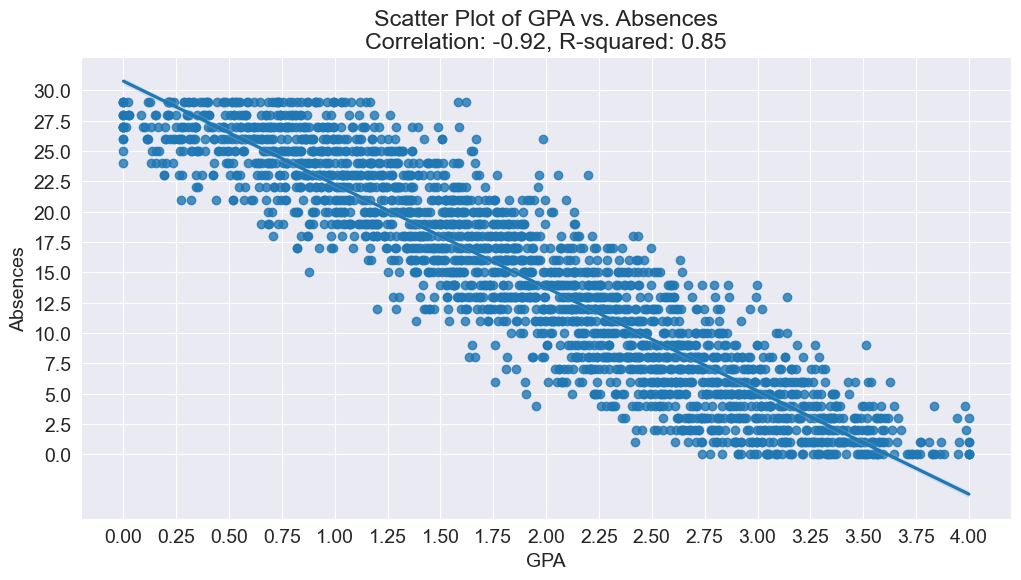

In [23]:
plt.figure(figsize=(12, 6))
ax=sns.regplot(x=df_std_pfm.GPA,y=df_std_pfm.Absences, data=df_std_pfm)

# Calculate correlation coefficient and R-squared value
corr, _ = stats.pearsonr(df_std_pfm['GPA'], df_std_pfm['Absences'])
r_squared = corr ** 2

y_ticks=np.arange(0,31,2.5)
x_ticks=np.arange(0,4.1,.25)
ax.set_yticks(y_ticks)
ax.set_xticks(x_ticks)
# plt.grid(True)
plt.title(f'Scatter Plot of GPA vs. Absences\nCorrelation: {corr:.2f}, R-squared: {r_squared:.2f}');
plt.savefig('Scatter Plot of GPA vs. Absences.png')


>There is a very strong negative correlation of -0.92 between GPA and Absences. This indicates that absences from classes significantly impact a student's academic performance.

#### Tutoring

In [46]:
df_std_pfm.groupby('Tutoring')['GPA'].mean()

Tutoring
0    1.818968
1    2.108325
Name: GPA, dtype: float64

In [29]:
df_std_pfm.groupby('Tutoring')['GPA'].describe()


,count,mean,std,min,25%,50%,75%,max
Tutoring,,,,,,,,
0,1671.0,1.818968,0.905854,0.0,1.072021,1.818613,2.539722,4.0
1,721.0,2.108325,0.905202,0.0,1.371185,2.095691,2.864498,4.0


This summary reinforces the insight we saw from your boxplot analysis: students who received tutoring (1) tend to have higher GPAs on average than those who did not (0).
Here’s a quick interpretation:
- The mean GPA is higher for tutored students (2.11) than for non-tutored students (1.82), a noticeable difference.
- The median, 25th percentile (Q1), and 75th percentile (Q3) are all higher for the tutored group — suggesting the entire GPA distribution is shifted upward.
- The standard deviations are nearly identical (~0.91), so the spread of GPA values is similar in both groups.
This implies that tutoring may be associated with better academic performance — though to test whether that difference is statistically significant, you'd want to run a t-test or perhaps build a regression model.


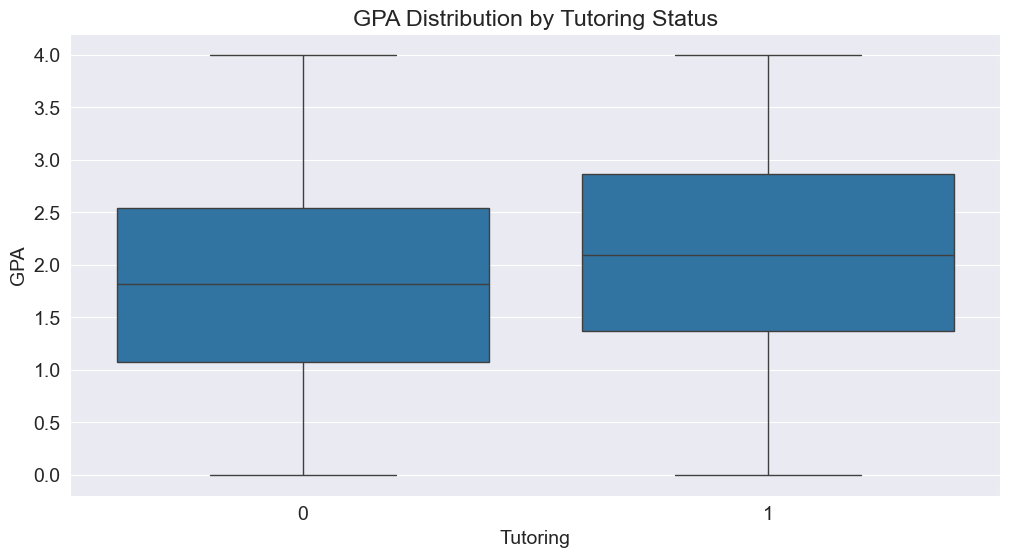

In [35]:

sns.boxplot(x='Tutoring', y='GPA', data=df_std_pfm)
plt.title("GPA Distribution by Tutoring Status")
plt.show()


In [34]:
from matplotlib.cbook import boxplot_stats

# For students without tutoring
stats_no_tutoring = boxplot_stats(df_std_pfm[df_std_pfm['Tutoring'] == 0]["GPA"].values)[0]
print("== Tutoring: No ==")
print("Median:", stats_no_tutoring["med"])
print("Q1:", stats_no_tutoring["q1"])
print("Q3:", stats_no_tutoring["q3"])
print("Lower Whisker:", stats_no_tutoring["whislo"])
print("Upper Whisker:", stats_no_tutoring["whishi"])
print()

# For students with tutoring
stats_yes_tutoring = boxplot_stats(df_std_pfm[df_std_pfm['Tutoring'] == 1]["GPA"].values)[0]
print("== Tutoring: Yes ==")
print("Median:", stats_yes_tutoring["med"])
print("Q1:", stats_yes_tutoring["q1"])
print("Q3:", stats_yes_tutoring["q3"])
print("Lower Whisker:", stats_yes_tutoring["whislo"])
print("Upper Whisker:", stats_yes_tutoring["whishi"])

== Tutoring: No ==
Median: 1.8186125604584331
Q1: 1.0720206708895483
Q3: 2.539722493917867
Lower Whisker: 0.0
Upper Whisker: 4.0

== Tutoring: Yes ==
Median: 2.0956913654305778
Q1: 1.3711850388917164
Q3: 2.864498066852598
Lower Whisker: 0.0
Upper Whisker: 4.0


From your boxplot output, it looks like students who received tutoring generally performed better on average:
- The median GPA for tutored students is about 2.10, compared to 1.82 for those without tutoring.
- The entire distribution is shifted upward, with higher Q1 and Q3 values for the tutored group.
- Both groups have the same lower and upper whiskers, indicating they share the same GPA extremes (0.0 to 4.0), but the central 50% of the tutored group is clearly stronger.


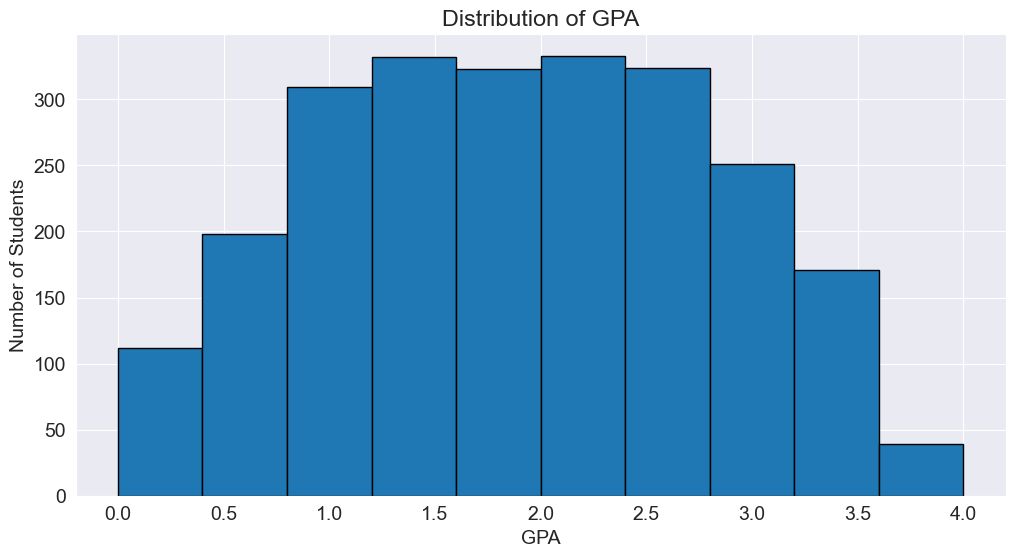

In [37]:
import matplotlib.pyplot as plt

plt.hist(df_std_pfm['GPA'], bins=10, edgecolor='black')
plt.title("Distribution of GPA")
plt.xlabel("GPA")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()

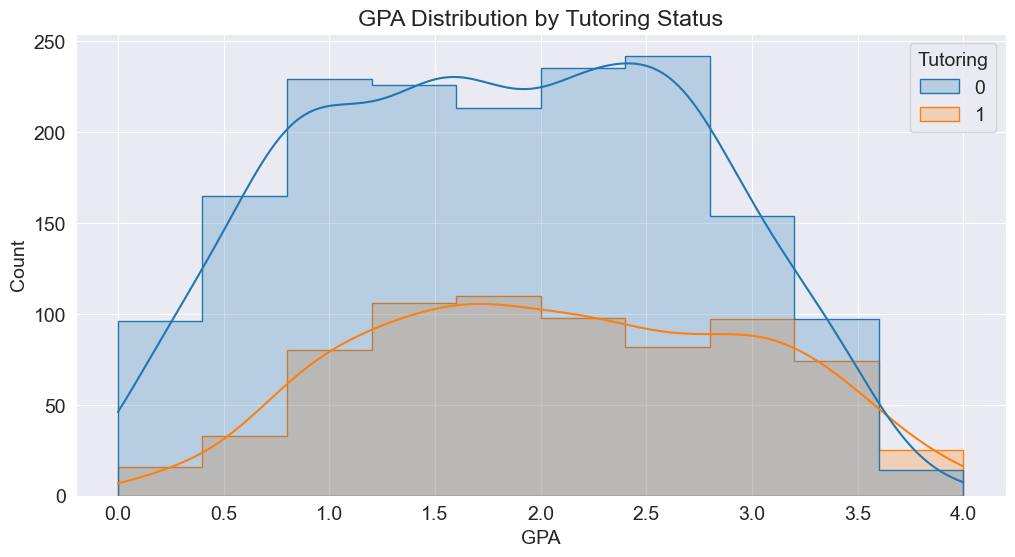

In [43]:
import seaborn as sns

sns.histplot(data=df_std_pfm, x='GPA', hue='Tutoring', bins=10, kde=True, element='step')
plt.title("GPA Distribution by Tutoring Status")
plt.xlabel("GPA")
plt.ylabel("Count")
# plt.legend(['Received Tutoring', 'No Tutoring Received'])
plt.show()

### Compare the Average GPA for Different Categories of Binary Variables

                       No       Yes  Difference
Gender           1.918679  1.894225   -0.024454
Tutoring         1.818968  2.108325    0.289357
Extracurricular  1.838316  2.015357    0.177041
Sports           1.871240  1.986381    0.115141
Music            1.872969  2.041664    0.168695
Volunteering     1.904899  1.913089    0.008190


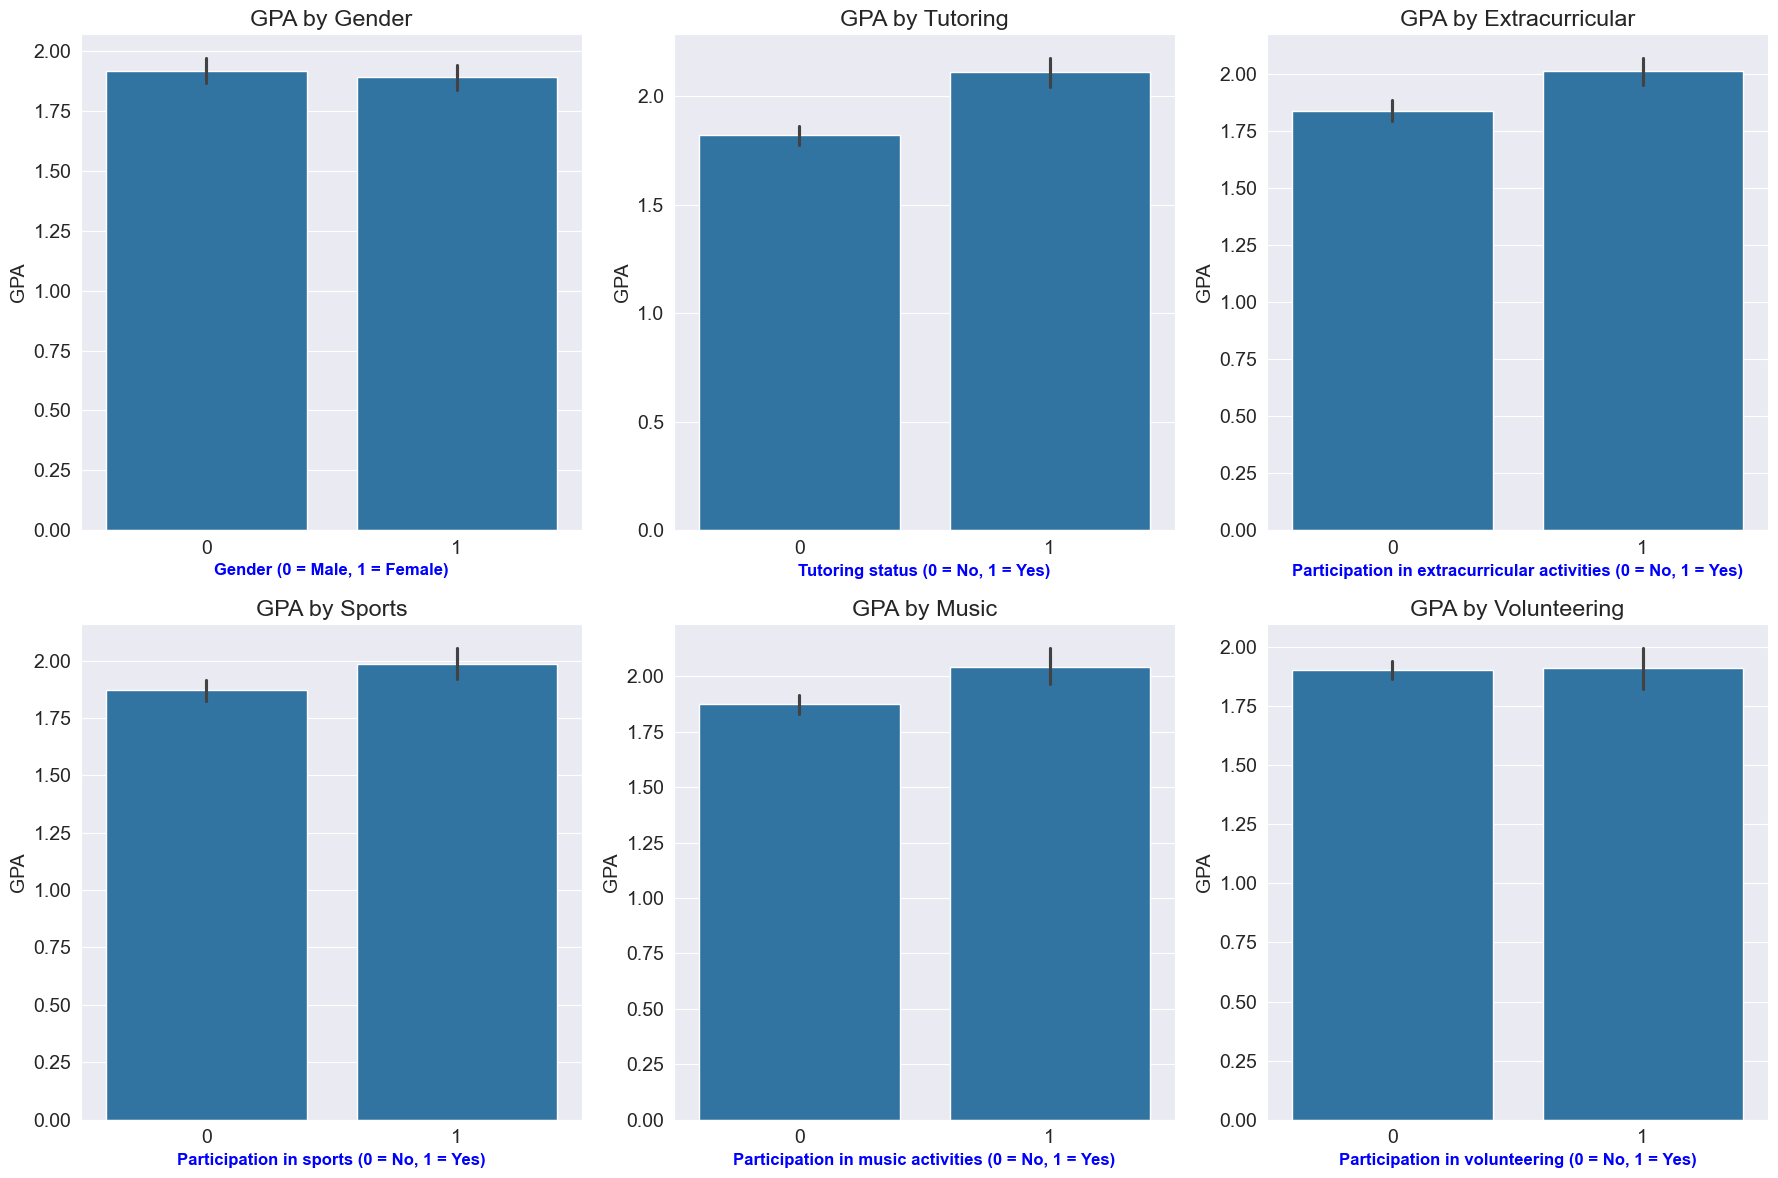

In [24]:
# Define the binary variables and the dependent variable
binary_vars = ['Gender', 'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
dependent_var = 'GPA'

# Create an empty dictionary to store the results
avg_gpa_by_category = {}

# Calculate the average GPA for each binary variable
for var in binary_vars:
    avg_gpa = df_std_pfm.groupby(var)[dependent_var].mean()
    avg_gpa_by_category[var] = avg_gpa

# Convert the dictionary to a DataFrame for better presentation
avg_gpa_df = pd.DataFrame(avg_gpa_by_category)
# print(avg_gpa_df)

# Transpose the DataFrame to match the desired table layout
avg_gpa_df = avg_gpa_df.T
# print(avg_gpa_df)

avg_gpa_df.columns = ['No', 'Yes']  # Rename columns for clarity
avg_gpa_df['Difference']= avg_gpa_df['Yes']- avg_gpa_df['No']

# Display the result
print(avg_gpa_df)

# Plot the data
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Gender vs GPA
sns.barplot(x='Gender', y='GPA', data=df_std_pfm, ax=axs[0, 0])
axs[0, 0].set_title('GPA by Gender')
axs[0, 0].set_xlabel('Gender (0 = Male, 1 = Female)', fontsize=12, fontweight='bold', color='blue')

# Plot 2: Tutoring vs GPA
sns.barplot(x='Tutoring', y='GPA', data=df_std_pfm, ax=axs[0, 1])
axs[0, 1].set_title('GPA by Tutoring')
axs[0, 1].set_xlabel('Tutoring status (0 = No, 1 = Yes)', fontsize=12, fontweight='bold', color='blue')

# Plot 3: Extracurricular vs GPA
sns.barplot(x='Extracurricular', y='GPA', data=df_std_pfm, ax=axs[0, 2])
axs[0, 2].set_title('GPA by Extracurricular')
axs[0, 2].set_xlabel('Participation in extracurricular activities (0 = No, 1 = Yes)', fontsize=12, fontweight='bold', color='blue')

# Plot 4: Sports vs GPA
sns.barplot(x='Sports', y='GPA', data=df_std_pfm, ax=axs[1, 0])
axs[1, 0].set_title('GPA by Sports')
axs[1, 0].set_xlabel('Participation in sports (0 = No, 1 = Yes)', fontsize=12, fontweight='bold', color='blue')

# Plot 5: Music vs GPA
sns.barplot(x='Music', y='GPA', data=df_std_pfm, ax=axs[1, 1])
axs[1, 1].set_title('GPA by Music')
axs[1, 1].set_xlabel('Participation in music activities (0 = No, 1 = Yes)', fontsize=12, fontweight='bold', color='blue')

# Plot 6: Volunteering vs GPA
sns.barplot(x='Volunteering', y='GPA', data=df_std_pfm, ax=axs[1, 2])
axs[1, 2].set_title('GPA by Volunteering')
axs[1, 2].set_xlabel('Participation in volunteering (0 = No, 1 = Yes)', fontsize=12, fontweight='bold', color='blue')

plt.tight_layout()
plt.savefig('barplot.png')
plt.show()

>Tutoring appears to have the most significant positive impact on GPA, followed by extracurricular activities, music, and sports. Gender and volunteering show very minimal differences in GPA.

### Population Distribution of Students by Ethnicity and Grade Class

Ethnicity             Caucasian  African American  Asian  Other
GradeClass                                                     
A (GPA >= 3.5)               47                24     27      9
B (3.0 <= GPA < 3.5)        136                59     47     27
C (2.5 <= GPA < 3.0)        198                79     76     38
D (2.0 <= GPA < 2.5)        194                91     86     43
F (GPA < 2.0)               632               240    234    105


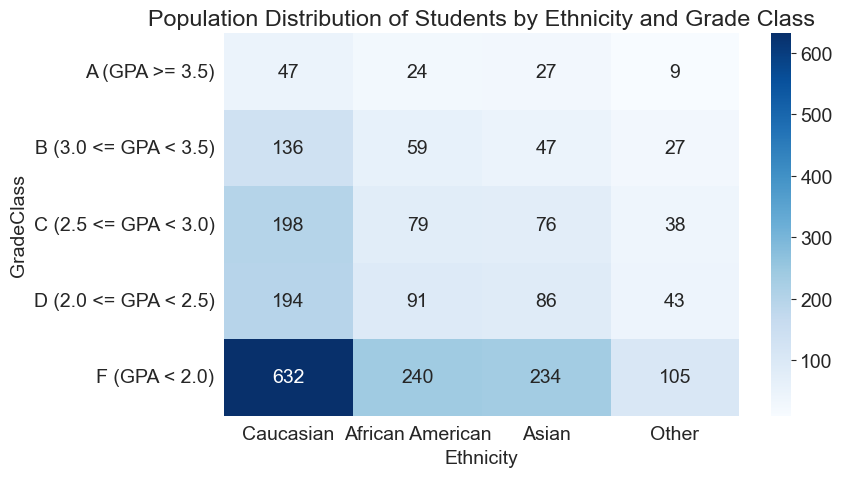

In [25]:
df=df_std_pfm.groupby('Ethnicity')[['GradeClass']].value_counts().reset_index(name='count')
df=df.pivot(index='GradeClass',columns='Ethnicity',values='count')

df.rename(index={0.0: 'A (GPA >= 3.5)', 1.0:'B (3.0 <= GPA < 3.5)', 2.0: 'C (2.5 <= GPA < 3.0)',3.0:'D (2.0 <= GPA < 2.5)',4.0:'F (GPA < 2.0)'}, inplace=True)
df.rename(columns={0: 'Caucasian', 1: 'African American', 2: 'Asian',3:'Other'}, inplace=True)

plt.title('Population Distribution of Students by Ethnicity and Grade Class')
sns.heatmap(df, fmt=".0f", annot=True, cmap='Blues')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('Population Distribution of Students by Ethnicity and Grade Class.png')
print(df)

>This distribution highlights that Caucasian students are the largest group in this dataset. Only a small portion of each ethnicity achieved high GradeClass standings.

### Percentage Distribution of Ethnicities Across Grade Classes

Ethnicity             Caucasian  African American      Asian      Other
A (GPA >= 3.5)         3.893952          4.868154   5.744681   4.054054
B (3.0 <= GPA < 3.5)  11.267606         11.967546  10.000000  12.162162
C (2.5 <= GPA < 3.0)  16.404308         16.024341  16.170213  17.117117
D (2.0 <= GPA < 2.5)  16.072908         18.458418  18.297872  19.369369
F (GPA < 2.0)         52.361226         48.681542  49.787234  47.297297


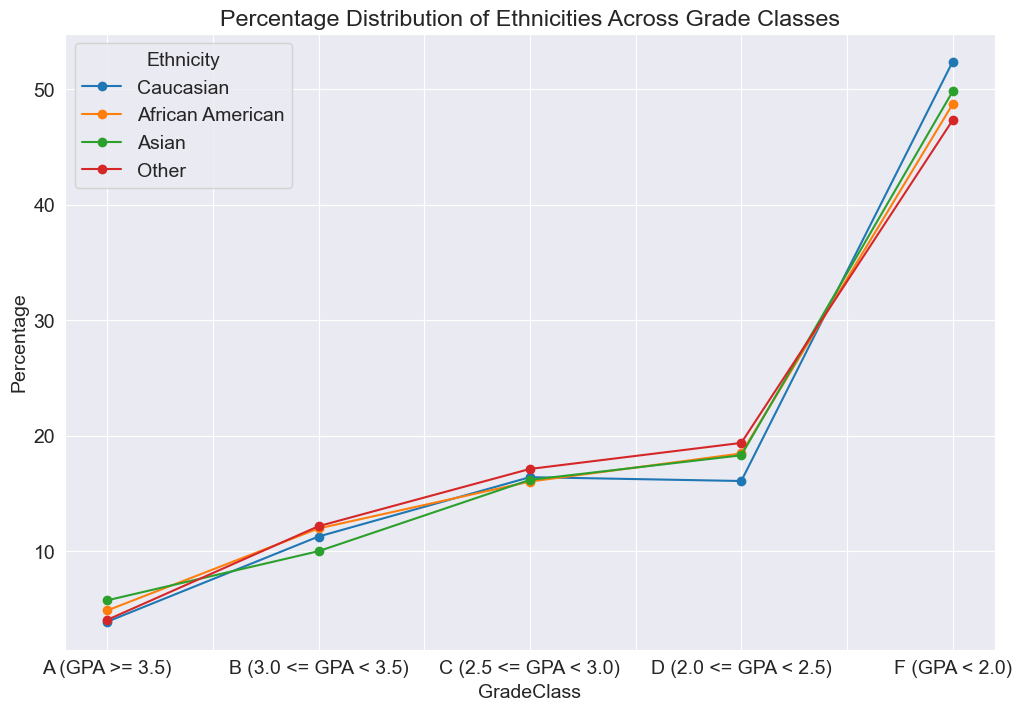

In [26]:
# Sum of each column
s = df.sum().to_frame(name='Total').T
# Concatenating the sum row to the original DataFrame
df_percent = pd.concat([df, s], axis=0)
df_percent = df_percent.div(df_percent.loc['Total'], axis=1) * 100
df_percent.drop('Total',inplace=True)
print(df_percent)

# Set the index to the grade class for plotting
# df_percent.set_index('GradeClass', inplace=True)

# Plot the line chart
df_percent.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Percentage Distribution of Ethnicities Across Grade Classes')
plt.xlabel('GradeClass')
plt.ylabel('Percentage')
plt.legend(title='Ethnicity')
plt.savefig('Percentage Distribution of Ethnicities Across Grade Classes.png')
plt.show()


>A relatively small percentage of students from all ethnic groups achieve a GPA of 3.5 or higher, with Asian students having the highest representation in this category.

### GPA Distribution by Age, Parental Education Level and Parental Support Level

In [27]:
xlabel={'ParentalEducation':['None','High School','Some College', 'Bachelor\'s','Higher' ],
       'ParentalSupport':['None','low','Moderate', 'High','Very High' ]}

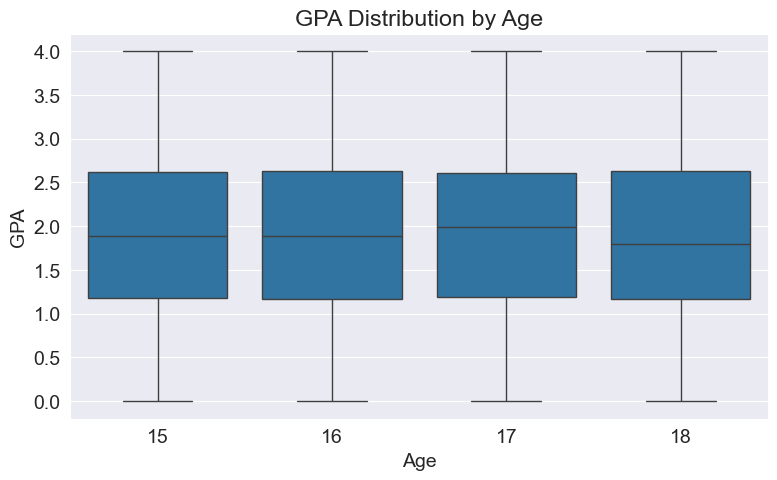

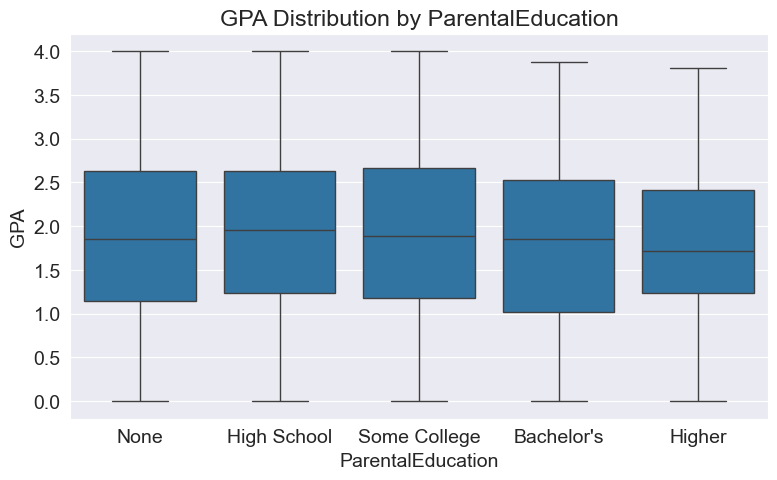

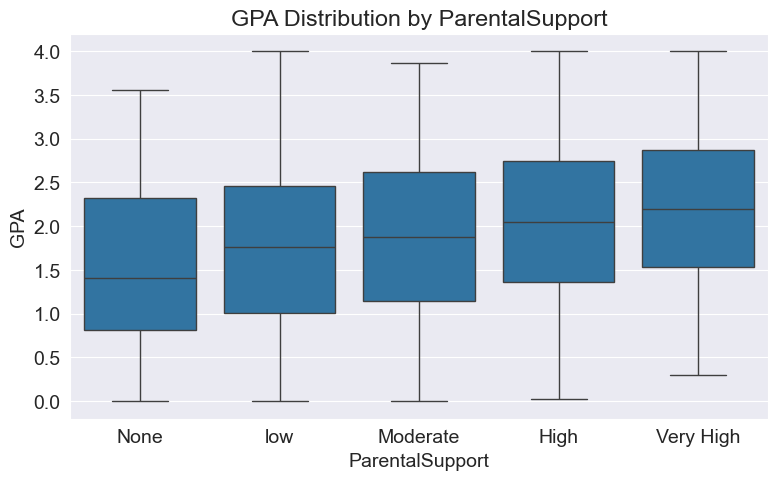

In [28]:
# fig, axs = plt.subplots(2, 3, figsize=(18, 12))

for col in df_std_pfm[['Age', 'ParentalEducation', 'ParentalSupport']]:
    sns.boxplot(x=df_std_pfm[col], y=df_std_pfm['GPA'])
    plt.title(f'GPA Distribution by {col}')
    plt.xlabel(col)
    
    # Custom x-axis labels
    if col != 'Age': 
        plt.gca().set_xticks(range(len(xlabel[col]))) 
        plt.gca().set_xticklabels(xlabel[col]) 

    plt.ylabel('GPA')
    plt.savefig(f'GPA Distribution by {col}.png')
    plt.show()
    

>The boxplots provide compelling evidence that parental support significantly enhances student GPA. As the level of parental support increases, the median GPA rises, the spread of GPAs narrows, and the overall distribution shifts toward higher GPAs. On the other hand, age and parental education level do not appear to significantly influence GPA distribution. The medians, interquartile ranges (IQRs), and overall ranges for these factors are quite similar, suggesting that age and parental education level may not have a strong impact on student GPAs within this dataset.


#### Parental Education

In [52]:
df_std_pfm.groupby('ParentalEducation')['GPA'].mean()

ParentalEducation
0    1.893045
1    1.944022
2    1.929881
3    1.809082
4    1.815812
Name: GPA, dtype: float64

> Students whose parents have a high school education exhibit the highest average GPA, at approximately 1.94—outperforming all other parental education levels in the dataset.

In [88]:
# Map numeric codes to labels
edu_map = {
    0: 'None',
    1: 'High School',
    2: 'Some College',
    3: "Bachelor's",
    4: 'Higher'
}

# Apply the mapping to a new column (or overwrite the existing one if preferred)
df_std_pfm['ParentalEducationLabel'] = df_std_pfm['ParentalEducation'].map(edu_map)

In [92]:
df_std_pfm

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,ParentalEducationLabel
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,Some College
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,High School
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,Bachelor's
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,Bachelor's
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,Some College
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0,Bachelor's
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0,High School
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0,Some College
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0,None


In [95]:
p_edu = ['None','High School','Some College', 'Bachelor\'s','Higher' ]
from matplotlib.cbook import boxplot_stats
for edu_lvl in p_edu:    
    stats = boxplot_stats(df_std_pfm[df_std_pfm['ParentalEducationLabel'] == edu_lvl]['GPA'].dropna())[0]  # Get stats for first box plot
    print(edu_lvl)
    print("Median:", stats["med"])
    print("Q1:", stats["q1"])
    print("Q3:", stats["q3"])
    print("Lower Whisker:", stats["whislo"])
    print("Upper Whisker:", stats["whishi"])
    print()

None
Median: 1.8556669117535305
Q1: 1.1504457972956197
Q3: 2.6364677896967317
Lower Whisker: 0.0
Upper Whisker: 4.0

High School
Median: 1.9541030879548216
Q1: 1.240343253315053
Q3: 2.62742644850863
Lower Whisker: 0.0
Upper Whisker: 4.0

Some College
Median: 1.8919481333844268
Q1: 1.1848862019208082
Q3: 2.6691885990290425
Lower Whisker: 0.0
Upper Whisker: 4.0

Bachelor's
Median: 1.8558655731681932
Q1: 1.0249424246515755
Q3: 2.5320829290477533
Lower Whisker: 0.0
Upper Whisker: 3.8806400848697424

Higher
Median: 1.7117287756555737
Q1: 1.241568523884211
Q3: 2.417723440815106
Lower Whisker: 0.0
Upper Whisker: 3.812757187598897



Text(0.5, 1.0, 'GPA Distribution by ParentalEducation')

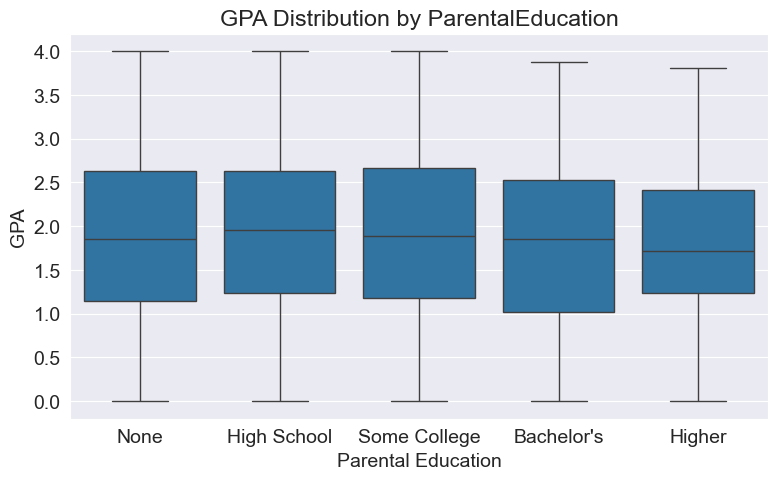

In [41]:
p_edu = ['None','High School','Some College', 'Bachelor\'s','Higher' ]

plt.figure(figsize=(9,5))
sns.boxplot(x='ParentalEducation', y='GPA', 
            data = df_std_pfm, )
plt.gca().set_xticks(range(len(p_edu))) 
plt.gca().set_xticklabels(p_edu) 
plt.xlabel("Parental Education")
plt.title("GPA Distribution by ParentalEducation")
# plt.savefig(output_folder+"GPA Distribution by ParentalEducation.png")

In [96]:
import pandas as pd
from matplotlib.cbook import boxplot_stats

# Define your ordered categories
p_edu = ['None', 'High School', 'Some College', "Bachelor's", 'Higher']

# Extract stats and collect into a list of dictionaries
rows = []
for edu_lvl in p_edu:
    gpa_values = df_std_pfm[df_std_pfm['ParentalEducationLabel'] == edu_lvl]['GPA'].dropna()
    stats_list = boxplot_stats(gpa_values)
    if stats_list:
        s = stats_list[0]
        rows.append({
            'Parental Education': edu_lvl,
            'Median': round(s['med'], 3),
            'Q1': round(s['q1'], 3),
            'Q3': round(s['q3'], 3),
            'Lower Whisker': round(s['whislo'], 3),
            'Upper Whisker': round(s['whishi'], 3)
        })
    else:
        rows.append({
            'Parental Education': edu_lvl,
            'Median': None,
            'Q1': None,
            'Q3': None,
            'Lower Whisker': None,
            'Upper Whisker': None
        })

# Create a DataFrame
stats_table = pd.DataFrame(rows)
print(stats_table)

  Parental Education  Median     Q1     Q3  Lower Whisker  Upper Whisker
0               None   1.856  1.150  2.636            0.0          4.000
1        High School   1.954  1.240  2.627            0.0          4.000
2       Some College   1.892  1.185  2.669            0.0          4.000
3         Bachelor's   1.856  1.025  2.532            0.0          3.881
4             Higher   1.712  1.242  2.418            0.0          3.813


### Summary
The dataset provided valuable insights into the factors influencing student performance. Regular class attendance, participation in sports and music activities, receiving tutoring when needed, and having strong parental support all contribute positively to students' academic outcomes.

Let us save and upload our work to Jovian before continuing

In [29]:
# import jovian

In [30]:
# jovian.commit()

## Asking and Answering Questions

Let's explore some columns within the dataset other than GPA and GradeClass. We will use the groupby() method very frequently to aggregate the variables, allowing us to analyze any relationships.

#### Q1: Do students who receive high parental support also receive more tutoring?

We will extract the ParentalSupport and Tutoring columns using the groupby() method to aggregate the counts, allowing us to analyze any relationships.

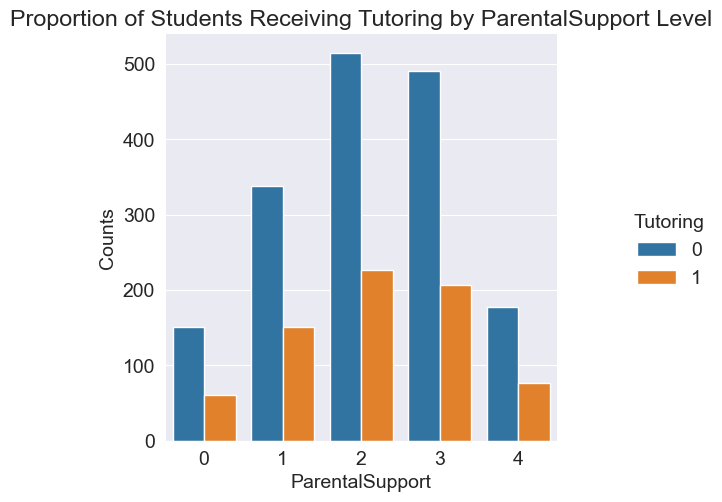

In [31]:
df_ptc=df_std_pfm.groupby('ParentalSupport')[['ParentalSupport','Tutoring']].value_counts().reset_index(name='Counts')
# df_ptc
sns.catplot(x='ParentalSupport', y='Counts', hue='Tutoring', data=df_ptc, kind='bar')
plt.title('Proportion of Students Receiving Tutoring by ParentalSupport Level');

>This plot shows that high parental support does not necessarily mean that students receive more tutoring.

#### Q2: Is there disproportionate representation in receiving tutoring across different ethnicities?

Long format:
          Ethnicity Tutoring  Proportion
0         Caucasian        0    0.690969
1  African American        0    0.711968
2             Asian        0    0.687234
3             Other        0    0.734234
4         Caucasian        1    0.309031
5  African American        1    0.288032
6             Asian        1    0.312766
7             Other        1    0.265766


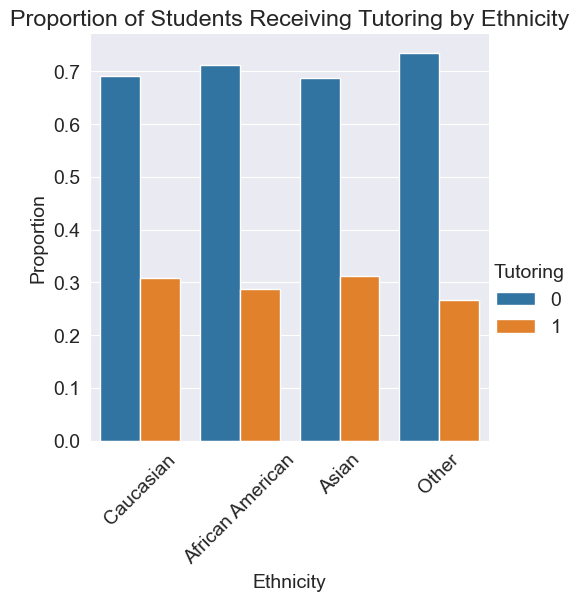

In [32]:
df_etc=df_std_pfm.groupby('Ethnicity')[['Tutoring']].value_counts().reset_index(name='Counts')

#Pivot the DataFram and normalize the counts to proportions
df_etc=df_etc.pivot(index='Ethnicity', columns='Tutoring', values='Counts')
df_etc.rename(index={0: 'Caucasian', 1: 'African American', 2: 'Asian',3:'Other'}, inplace=True)
# print(df_etc)
df_etc['total']=df_etc[0]+df_etc[1] 
df_etc[0]=df_etc[0]/df_etc['total']
df_etc[1]=df_etc[1]/df_etc['total']
df_etc.drop('total',axis=1,inplace=True)

# Melting the DataFrame Is there disproportionate representation in receiving tutoring across different ethnicities?to long format
df_long = df_etc.reset_index().melt(id_vars=['Ethnicity'], var_name='Tutoring', value_name='Proportion')
print("Long format:")
print(df_long)

sns.catplot(x='Ethnicity', y='Proportion', hue='Tutoring', data=df_long, kind='bar')
plt.xticks(rotation=45)
plt.title('Proportion of Students Receiving Tutoring by Ethnicity');

>Asian students have the highest proportion of receiving tutoring (31.28%). The "Other" category has the lowest proportion of receiving tutoring (26.58%).

#### Q3: Is there disproportionate representation in parental support levels across different ethnicities?

<bound method NDFrame.head of ParentalSupport       None       low  Moderate      High  Very High
Ethnicity                                                          
Caucasian         0.089478  0.210439  0.304888  0.280862   0.114333
African American  0.093306  0.217039  0.318458  0.288032   0.083164
Asian             0.085106  0.189362  0.314894  0.297872   0.112766
Other             0.081081  0.175676  0.301802  0.342342   0.099099>
Long format:
           Ethnicity ParentalSupport  Proportion
0          Caucasian            None    0.089478
1   African American            None    0.093306
2              Asian            None    0.085106
3              Other            None    0.081081
4          Caucasian             low    0.210439
5   African American             low    0.217039
6              Asian             low    0.189362
7              Other             low    0.175676
8          Caucasian        Moderate    0.304888
9   African American        Moderate    0.318458
10       

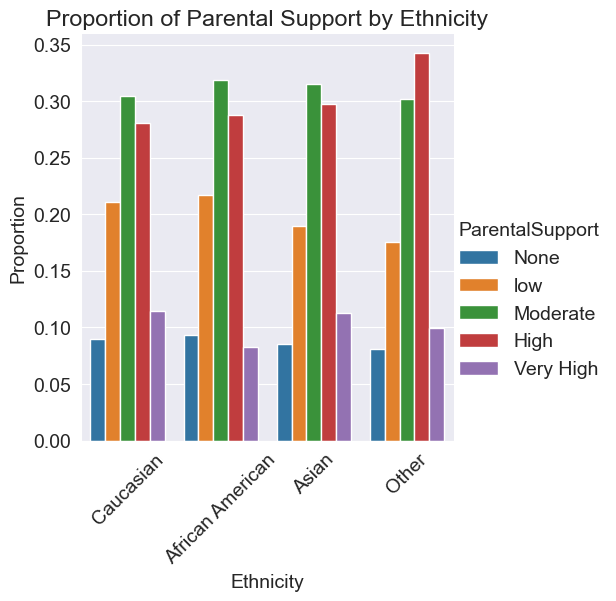

In [33]:
df_epc=df_std_pfm.groupby('Ethnicity')[['ParentalSupport']].value_counts().reset_index(name='Counts')

#Pivot the DataFram and normalize the counts to proportions
df_epc=df_epc.pivot(index='Ethnicity', columns='ParentalSupport', values='Counts')
df_epc.rename(index={0: 'Caucasian', 1: 'African American', 2: 'Asian',3:'Other'}, inplace=True)
df_epc.rename(columns={0: 'None', 1: 'low',2:'Moderate',3:'High',4:'Very High'}, inplace=True)
# print(df_epc)
df_epc['total']=df_epc['None']+df_epc['low']+df_epc['Moderate'] +df_epc['High'] +df_epc['Very High'] 
df_epc['None']=df_epc['None']/df_epc['total']
df_epc['low']=df_epc['low']/df_epc['total']
df_epc['Moderate']=df_epc['Moderate']/df_epc['total']
df_epc['High']=df_epc['High']/df_epc['total']
df_epc['Very High']=df_epc['Very High']/df_epc['total']
# print(df_epc)
df_epc.drop('total',axis=1,inplace=True)
print(df_epc.head)

df_long = df_epc.reset_index().melt(id_vars=['Ethnicity'], var_name='ParentalSupport', value_name='Proportion')
print("Long format:")
print(df_long)

sns.catplot(x='Ethnicity', y='Proportion', hue='ParentalSupport', data=df_long, kind='bar')
plt.xticks(rotation=45)
plt.title('Proportion of Parental Support by Ethnicity');

>Caucasian and Asian students have higher proportions of very high parental support compared to African American and Other students.

#### Q4: Which gender of students tends to participate in music activities?

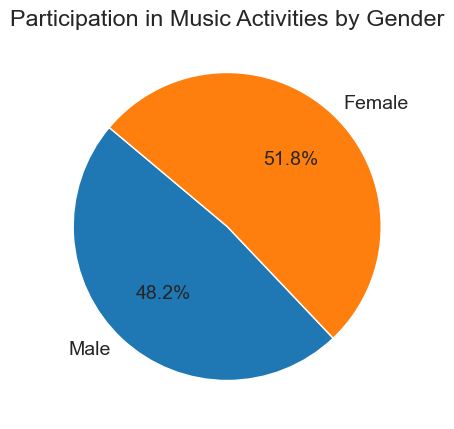

In [34]:
# Filtering the DataFrame where Music == 1 and then grouping by Gender

gender_counts = df_std_pfm[df_std_pfm['Music'] == 1].groupby('Gender').size().reset_index(name='Counts')
gender_counts.set_index('Gender', inplace=True)
gender_counts.rename(index={0:'Male', 1:'Female'},inplace=True)

# Create the pie chart 
plt.pie(gender_counts.Counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Participation in Music Activities by Gender');


>The participation in music activities between genders is quite balanced, with a minor lead for females.

#### Q5: Which gender of students tends to participate in sports?

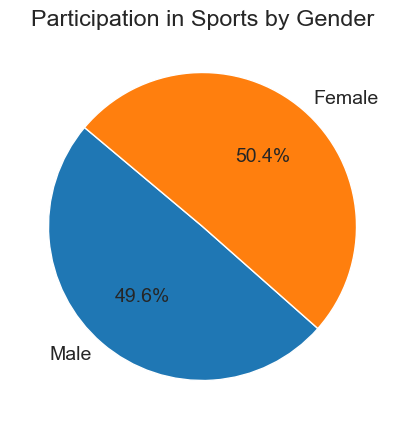

In [35]:
sports_counts=df_std_pfm[df_std_pfm['Sports']==1].groupby('Gender').size().reset_index(name="Counts")
sports_counts.set_index('Gender',inplace=True)
sports_counts.rename(index={0:'Male', 1:'Female'},inplace=True)

plt.pie(sports_counts.Counts, labels=sports_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Participation in Sports by Gender');

>The data reflects a balanced gender participation in sports activities.

Let us save and upload our work to Jovian before continuing.

In [36]:
# import jovian

In [37]:
# jovian.commit()

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In [38]:
# import jovian

In [39]:
# jovian.commit()

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions (delete this cell)
>
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
>
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml




In [40]:
# import jovian

In [41]:
# jovian.commit()